# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from tpot import TPOTRegressor

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
P3HT_df = pd.read_csv("combined_df_P3HT_step.csv")
P3HT_df

,solution_concentration,polymer_mw,polymer_mn,polymer_dispersity,hole_mobility,solution_treatment,substrate_pretreatment,post_process,channel_width,channel_length,dielectric_thickness,film_deposition_type_drop,film_deposition_type_spin,dielectric_material_SiO2,electrode_configuration_BGBC,electrode_configuration_BGTC,electrode_configuration_TGBC,gate_material_Other,film_deposition_type_MGC,dielectric_material_other,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,treatment_type_sam,treatment_type_plasma,treatment_type_uv_ozone,solution_treatment_poor_solvent,solution_treatment_aging,solution_treatment_sonication,solution_treatment_mixing,solution_treatment_uv_irradiation
0,10.0,15.4000,10.30,1.50,0.007600,1,1,1,10000,20.0,230,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
1,10.0,20.0000,11.10,1.80,0.004960,1,1,1,10000,20.0,230,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
2,10.0,22.0000,13.80,1.60,0.009480,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
3,10.0,29.0000,19.30,1.50,0.012000,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
4,10.0,42.0000,23.30,1.80,0.005290,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
5,10.0,52.0000,22.60,2.30,0.005540,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
6,10.0,76.0000,44.70,1.70,0.002990,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
7,10.0,270.0000,117.40,2.30,0.008100,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,62,0,0,1,0,0,0,1,0,0,0
8,10.0,15.4000,10.30,1.50,0.001700,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,213,0,0,1,0,0,0,1,0,0,0
9,10.0,20.0000,11.10,1.80,0.001490,1,1,1,10000,20.0,200,0,1,1,1,0,0,0,0,0,213,0,0,1,0,0,0,1,0,0,0


In [3]:
P3HT_df_columns = P3HT_df.columns.tolist()
P3HT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'hole_mobility',
 'solution_treatment',
 'substrate_pretreatment',
 'post_process',
 'channel_width',
 'channel_length',
 'dielectric_thickness',
 'film_deposition_type_drop',
 'film_deposition_type_spin',
 'dielectric_material_SiO2',
 'electrode_configuration_BGBC',
 'electrode_configuration_BGTC',
 'electrode_configuration_TGBC',
 'gate_material_Other',
 'film_deposition_type_MGC',
 'dielectric_material_other',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'treatment_type_sam',
 'treatment_type_plasma',
 'treatment_type_uv_ozone',
 'solution_treatment_poor_solvent',
 'solution_treatment_aging',
 'solution_treatment_sonication',
 'solution_treatment_mixing',
 'solution_treatment_uv_irradiation']

In [4]:
P3HT_Y = P3HT_df[['hole_mobility']]
P3HT_X = P3HT_df.drop(labels = 'hole_mobility', axis = 1)
print(P3HT_X.shape)
print(P3HT_Y.shape)

(115, 30)
(115, 1)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

Y_pred_train = LR_model.predict(X_train)
Y_pred_test = LR_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train,Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test,Y_pred_test)

print(f"Mean Squared Error Train: {mse_train}")
print(f"R^2 Score Train: {r2_train}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"R^2 Score Test: {r2_test}")

Mean Squared Error Train: 0.0008373243221231764
R^2 Score Train: 0.5735591864884009
Mean Squared Error Test: 0.0007614945873207683
R^2 Score Test: -0.5469076303137805


In [6]:
X_test.shape

(23, 30)

## Polynomial regression

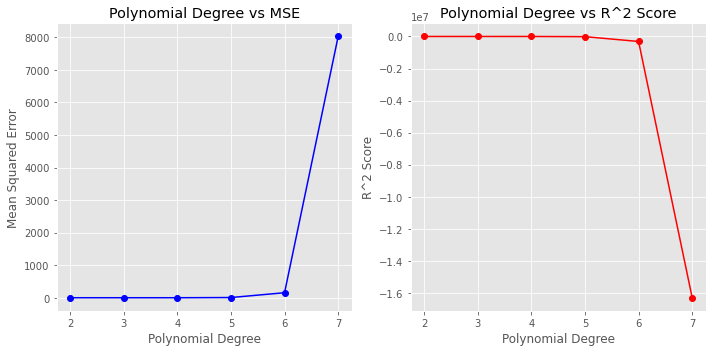

[0.0005817350988815453, 0.004369526514936092, 0.07220513506804832, 6.165463207020517, 153.9443172957012, 8026.633260620959]
[-0.18174242898740212, -7.8762993452057035, -145.67822495966257, -12523.582890227977, -312723.00754157157, -16305381.130516302]


In [7]:
from sklearn.preprocessing import PolynomialFeatures

degrees = range(2, 8)  # Polynomial degrees from 2 to 10
mse_values = []  # To store mean squared error values
r2_values = []  # To store R^2 values

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(P3HT_X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, P3HT_Y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting Polynomial Degree vs MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='b')
plt.title('Polynomial Degree vs MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')

# Plotting Polynomial Degree vs R^2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(degrees, r2_values, marker='o', linestyle='-', color='r')
plt.title('Polynomial Degree vs R^2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(mse_values)
print(r2_values)

## Ridge regression

[-0.5169279202783257, -0.48234370967012374, -0.4494655772434395, -0.419421006101415, -0.3922418613150549, -0.3676837254561729, -0.3454469969144529, -0.3252437743088765, -0.3068170695475212, -0.2899439238605468]


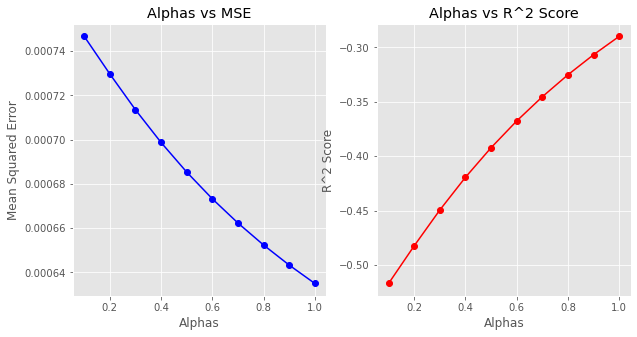

In [8]:
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)

mse_scores = []
r2_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Alphas vs MSE')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='r')
plt.title('Alphas vs R^2 Score')
plt.xlabel('Alphas')
plt.ylabel('R^2 Score')
print(r2_scores)

## Lasso regression

[0.2610923423046708, 0.25162244357995256, 0.20609228662820966, 0.12449881714856026, 0.006842035141002678, -0.14101245690529018, -0.19448737775552694, -0.19443833463037796, -0.1943893224667399, -0.19434034126461208]


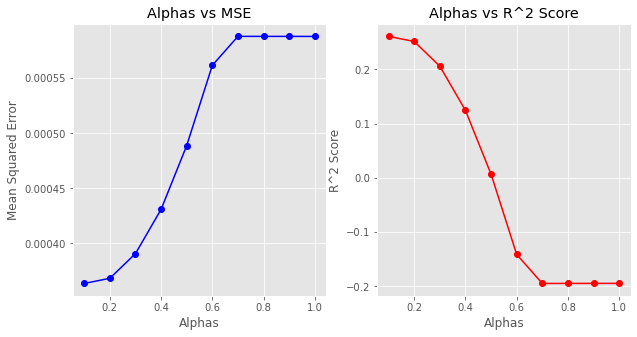

In [9]:
from sklearn.linear_model import Lasso

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)

mse_scores = []
r2_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Alphas vs MSE')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='r')
plt.title('Alphas vs R^2 Score')
plt.xlabel('Alphas')
plt.ylabel('R^2 Score')
print(r2_scores)

## Elsaticnet regression

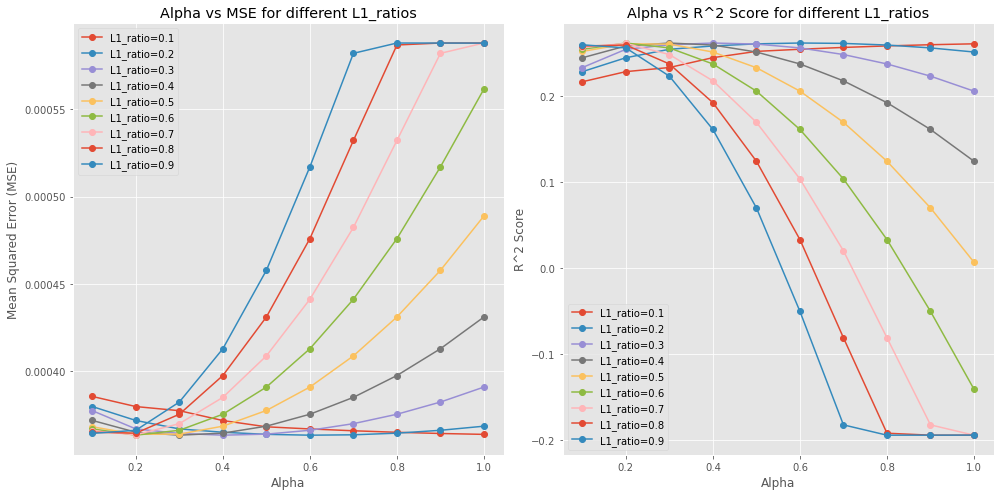

{0.1: [0.21698506514083982, 0.2287861662181052, 0.2335846602789282, 0.24505989252308358, 0.2523649965129645, 0.2548512575922559, 0.2569747200797138, 0.25873615722681076, 0.26013523645588355, 0.26117232681040126], 0.2: [0.22875906607325946, 0.24496814707181735, 0.25481255260564106, 0.2586928298133485, 0.2611279256428285, 0.26211778613044, 0.2616630167575056, 0.25976057694512555, 0.2564090102699046, 0.2516297745294236], 0.30000000000000004: [0.23353573599834365, 0.2547996425267479, 0.26007617197881994, 0.2621036664274735, 0.2608824839215309, 0.2564021916524418, 0.24869366565830497, 0.23772986691312714, 0.22351961373485352, 0.2060634619501076], 0.4: [0.24492146295085915, 0.25867114313123973, 0.262096601890912, 0.2597455808738216, 0.2516252070269709, 0.23773276890627604, 0.21806933582404808, 0.19263575472645056, 0.16143287241410598, 0.12446153554212647], 0.5: [0.2523090497780692, 0.26110124334343965, 0.26087340769612866, 0.25162428779127133, 0.23336036729451015, 0.20607993785773526, 0.1697

In [10]:
from sklearn.linear_model import ElasticNet

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1, 0.1)

mse_scores = {l1_ratio: [] for l1_ratio in l1_ratios}
r2_scores = {l1_ratio: [] for l1_ratio in l1_ratios}

for l1_ratio in l1_ratios:
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        mse_scores[l1_ratio].append(mse)
        r2_scores[l1_ratio].append(r2)

plt.figure(figsize=(14, 7))

# MSE plot
plt.subplot(1, 2, 1)
for l1_ratio in l1_ratios:
    plt.plot(alphas, mse_scores[l1_ratio], label=f'L1_ratio={l1_ratio:.1f}', marker = 'o')
plt.title('Alpha vs MSE for different L1_ratios')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# R^2 score plot
plt.subplot(1, 2, 2)
for l1_ratio in l1_ratios:
    plt.plot(alphas, r2_scores[l1_ratio], label=f'L1_ratio={l1_ratio:.1f}', marker = 'o')
plt.title('Alpha vs R^2 Score for different L1_ratios')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()
print(r2_scores)


## Support Vector Regression (SVR)

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

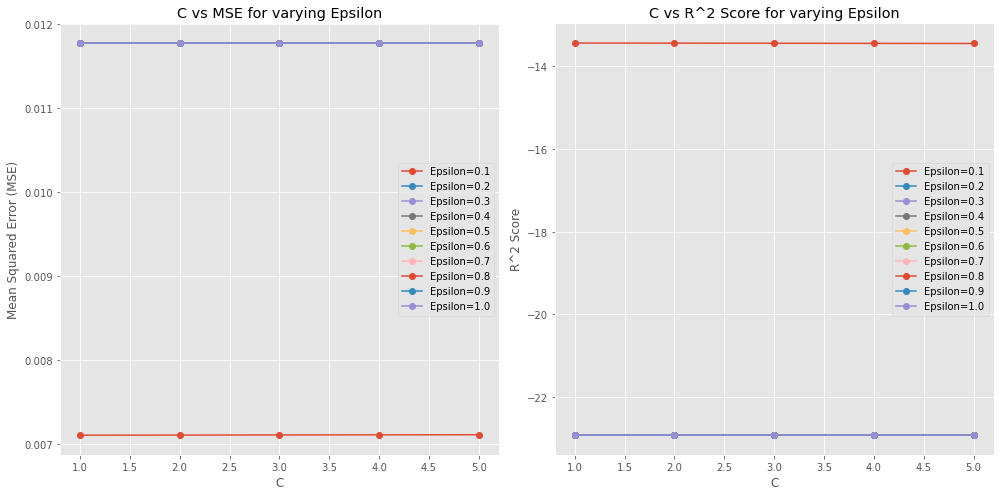

[[-13.43257595 -22.92329693 -22.92329693 -22.92329693 -22.92329693
  -22.92329693 -22.92329693 -22.92329693 -22.92329693 -22.92329693]
 [-13.43572514 -22.92329693 -22.92329693 -22.92329693 -22.92329693
  -22.92329693 -22.92329693 -22.92329693 -22.92329693 -22.92329693]
 [-13.43846401 -22.92329693 -22.92329693 -22.92329693 -22.92329693
  -22.92329693 -22.92329693 -22.92329693 -22.92329693 -22.92329693]
 [-13.44120368 -22.92329693 -22.92329693 -22.92329693 -22.92329693
  -22.92329693 -22.92329693 -22.92329693 -22.92329693 -22.92329693]
 [-13.44394415 -22.92329693 -22.92329693 -22.92329693 -22.92329693
  -22.92329693 -22.92329693 -22.92329693 -22.92329693 -22.92329693]]


In [11]:
from sklearn.svm import SVR

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size=0.2, random_state=42)

C_values = np.arange(1.0, 6.0, 1)
epsilon_values = np.arange(0.1, 1.1, 0.1)

mse_scores = np.zeros((len(C_values), len(epsilon_values)))
r2_scores = np.zeros((len(C_values), len(epsilon_values)))

for i, C in enumerate(C_values):
    for j, epsilon in enumerate(epsilon_values):
        svr_model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr_model.fit(X_train, Y_train)
        Y_pred = svr_model.predict(X_test)
        mse_scores[i, j] = mean_squared_error(Y_test, Y_pred)
        r2_scores[i, j] = r2_score(Y_test, Y_pred)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for j, epsilon in enumerate(epsilon_values):
    plt.plot(C_values, mse_scores[:, j], label=f'Epsilon={epsilon:.1f}', marker = 'o')
plt.title('C vs MSE for varying Epsilon')
plt.xlabel('C')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
for j, epsilon in enumerate(epsilon_values):
    plt.plot(C_values, r2_scores[:, j], label=f'Epsilon={epsilon:.1f}', marker = 'o')
plt.title('C vs R^2 Score for varying Epsilon')
plt.xlabel('C')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()

print(r2_scores)

## Decision tree regression

In [12]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, Y_train)

Y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0028744093295697175
R^2 Score: -4.839103519042499


## Random forest regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


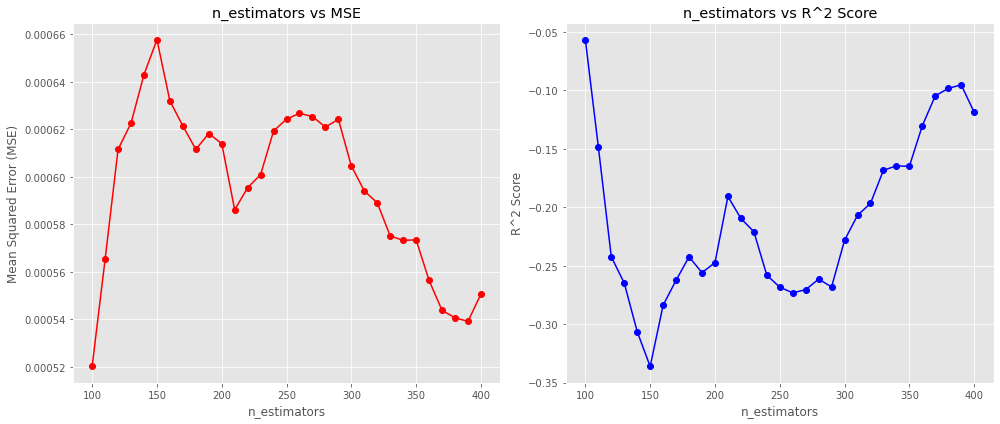

[-0.05659489157063491, -0.14822928385955403, -0.24238507338459314, -0.2648317560238884, -0.3063841960226996, -0.3362315404985712, -0.28381930260386423, -0.2624687561588859, -0.24238340250851076, -0.25597889164265797, -0.2473253707943004, -0.19072323175238126, -0.2095604211346611, -0.22085301364810928, -0.2581135900816762, -0.2683315327679108, -0.2732186164916768, -0.27048900470019754, -0.2615086044481685, -0.2681504982389198, -0.22816264119468044, -0.2068874574450068, -0.19661216336367482, -0.16827897061334096, -0.1645575943102724, -0.16494533723991012, -0.13017767020525084, -0.10458844611972484, -0.09826136349227199, -0.09517841122985926, -0.11865090636745546]


In [13]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(P3HT_X, P3HT_Y, test_size=0.2, random_state=42)

n_estimators_range = range(100, 410, 10)

mse_scores = []
r2_scores = []

for n_estimators in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, Y_train)
    Y_pred = rf_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('n_estimators vs MSE')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error (MSE)')

# Plotting n_estimators vs R^2
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('n_estimators vs R^2 Score')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

## Gradient bossting regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

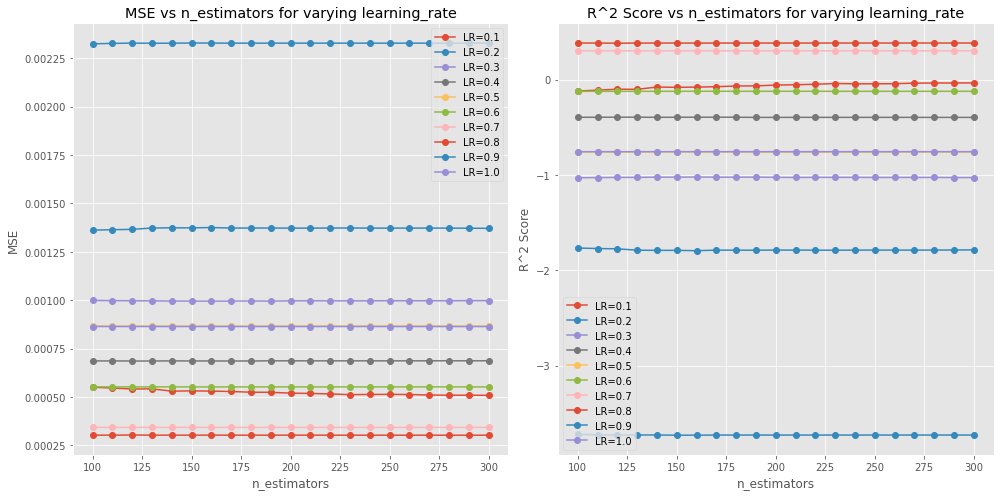

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Parameter ranges
n_estimators_range = range(100, 310, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
fixed_max_depth = 3  # Fixed parameter

# Initialize storage for performance metrics
mse_scores = np.zeros((len(learning_rate_range), len(n_estimators_range)))
r2_scores = np.zeros((len(learning_rate_range), len(n_estimators_range)))

# Evaluate model performance over varying n_estimators and learning_rate
for i, learning_rate in enumerate(learning_rate_range):
    for j, n_estimators in enumerate(n_estimators_range):
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=fixed_max_depth, random_state=42)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse_scores[i, j] = mean_squared_error(Y_test, Y_pred)
        r2_scores[i, j] = r2_score(Y_test, Y_pred)

# Plotting
plt.figure(figsize=(14, 7))

# MSE Plot
plt.subplot(1, 2, 1)
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, mse_scores[i, :], label=f'LR={learning_rate:.1f}', marker = 'o')
plt.title('MSE vs n_estimators for varying learning_rate')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()

# R^2 Score Plot
plt.subplot(1, 2, 2)
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, r2_scores[i, :], label=f'LR={learning_rate:.1f}', marker = 'o')
plt.title('R^2 Score vs n_estimators for varying learning_rate')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

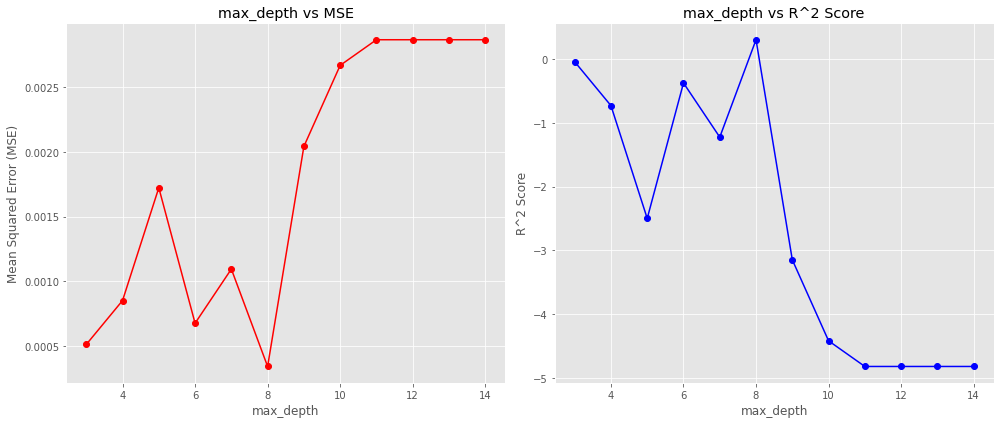

[-0.043773372325377924, -0.7320767622579705, -2.4990579358846237, -0.37647656360529935, -1.225489564401867, 0.3007640887039059, -3.147386870936061, -4.417113248460265, -4.818760710806168, -4.818761256062544, -4.818761031777436, -4.818761049476549]


In [16]:
fixed_learning_rate = 0.1
fixed_n_estimators = 250
max_depth_range = range(3, 15)

mse_scores = []
r2_scores = []

for max_depth in max_depth_range:
    model = GradientBoostingRegressor(n_estimators=fixed_n_estimators, learning_rate=fixed_learning_rate, max_depth=max_depth, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('max_depth vs MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(max_depth_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('max_depth vs R^2 Score')
plt.xlabel('max_depth')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

## K-nearest Neighbors Regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


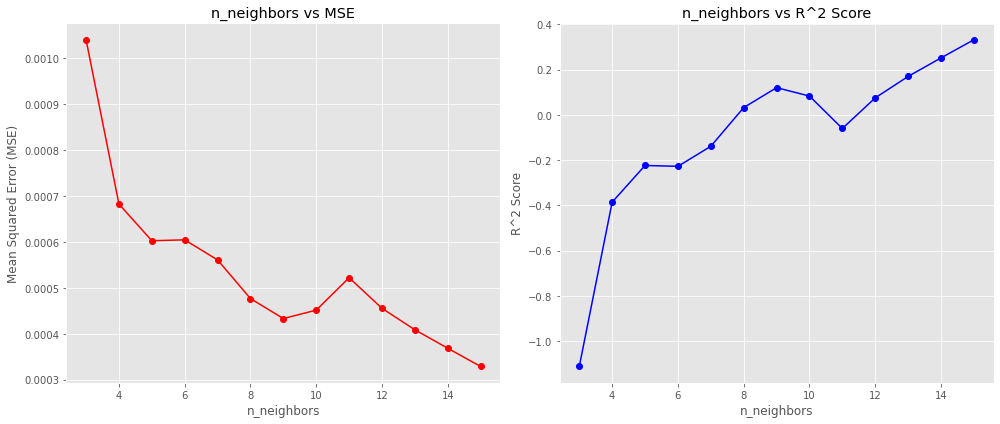

[-1.1122703419930509, -0.3858263591069866, -0.22362878044690193, -0.22751810998390565, -0.1388268402545314, 0.0321769715778768, 0.12035085209380003, 0.08324651030090668, -0.060154951256911504, 0.07521848201622583, 0.17002774792139963, 0.25182409732055633, 0.33224173001425605]


In [17]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors_range = range(3, 16)

mse_scores = []
r2_scores = []

for n_neighbors in n_neighbors_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X_train, Y_train)
    Y_pred = knn_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_neighbors_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('n_neighbors vs MSE')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(n_neighbors_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('n_neighbors vs R^2 Score')
plt.xlabel('n_neighbors')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

## Neural network regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataC

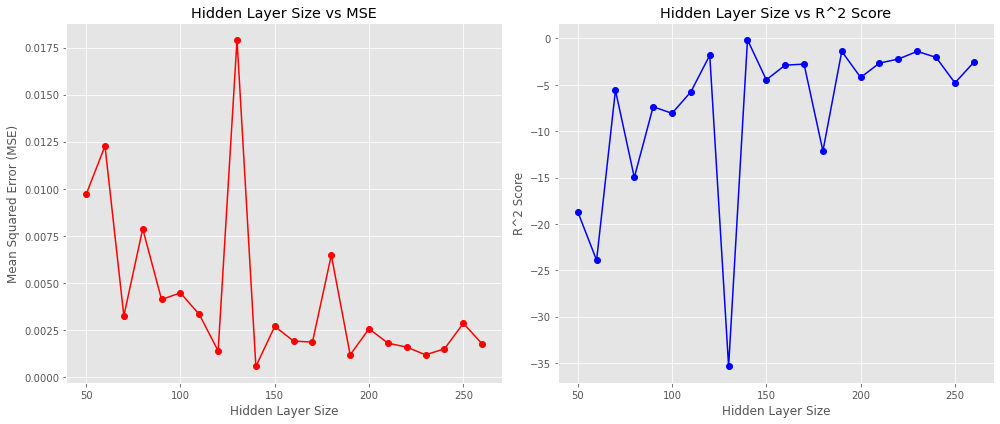

[-18.691734101442936, -23.928649994698908, -5.583328573449646, -14.989346094232744, -7.362361794193912, -8.077714639130559, -5.749387895665483, -1.808308458234389, -35.388877638688236, -0.1352079548720715, -4.459602691433701, -2.875894397760844, -2.7655734361223825, -12.144092286322104, -1.385001532155536, -4.204332606186687, -2.6512542872300684, -2.2202088071561237, -1.3903962854940146, -2.0367035809906655, -4.795522650951552, -2.5629397572753283]


In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layer_sizes_range = range(50, 270, 10)

mse_scores = []
r2_scores = []

for size in hidden_layer_sizes_range:
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', solver='adam', max_iter=1000, random_state=42)
    mlp_regressor.fit(X_train_scaled, Y_train)
    Y_pred = mlp_regressor.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('Hidden Layer Size vs MSE')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Hidden Layer Size vs R^2 Score')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

In [21]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_1.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=2 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
Pipeline encountered that has previously be

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_2.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=2 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
Pipeline encountered that has previously be

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
tpot = TPOTRegressor(generations=50, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_3.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=2 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
Pipeline encountered that has previously be

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
tpot = TPOTRegressor(generations=100, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_4.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/5050 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=2 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
Pipeline encountered that has previously be

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [25]:
tpot = TPOTRegressor(generations=5, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_5.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor mu

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
tpot = TPOTRegressor(generations=10, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_6.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor mu

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
tpot = TPOTRegressor(generations=50, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_7.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/5100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor mu

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
tpot = TPOTRegressor(generations=100, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_8.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor mu

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [29]:
tpot = TPOTRegressor(generations=5, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_9.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_te

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [30]:
tpot = TPOTRegressor(generations=10, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_10.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_te

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
tpot = TPOTRegressor(generations=50, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_11.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/10200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_te

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
tpot = TPOTRegressor(generations=100, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_12.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/20200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_te

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
tpot = TPOTRegressor(generations=5, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_13.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/2400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead.

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [34]:
tpot = TPOTRegressor(generations=10, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_14.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/4400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead.

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [35]:
tpot = TPOTRegressor(generations=50, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_15.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/20400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead.

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [36]:
tpot = TPOTRegressor(generations=100, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)

print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_P3HT_pipeline_combined_MYL_16.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/40400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'quantile', 'squared_error'}. Got 'ls' instead.

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
